# Business Sales Data Analysis

This project simulates a real business scenario where data is analyzed to support decision-making and generate insights.


In [6]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import pandas as pd

In [8]:
import pandas as pd
# load dataset
df = pd.read_csv("../data/raw/sales.csv", encoding="latin1")

# preview data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
#Inspect structure
df.shape
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   str    
 2   Order Date     9994 non-null   str    
 3   Ship Date      9994 non-null   str    
 4   Ship Mode      9994 non-null   str    
 5   Customer ID    9994 non-null   str    
 6   Customer Name  9994 non-null   str    
 7   Segment        9994 non-null   str    
 8   Country        9994 non-null   str    
 9   City           9994 non-null   str    
 10  State          9994 non-null   str    
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   str    
 13  Product ID     9994 non-null   str    
 14  Category       9994 non-null   str    
 15  Sub-Category   9994 non-null   str    
 16  Product Name   9994 non-null   str    
 17  Sales          9994 non-null   float64
 18  Quantity       9994

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
#Convert date column to datetime
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='str')

In [11]:
# calculate missing values per column
missing = df.isna().sum().sort_values(ascending=False)

# show columns with missing values only
missing[missing > 0]

Series([], dtype: int64)

In [12]:
# convert order_date to datetime
date_col = next((c for c in ["order_date", "orderdate", "date", "order date", "order_dt"] if c in df.columns), None)
if date_col is None:
    print("No date column found. Available columns:", list(df.columns))
else:
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
    if date_col != "order_date":
        df["order_date"] = df[date_col]

# convert numeric columns if necessary
num_cols = ["sales", "profit", "quantity", "discount"]

for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

In [13]:
# analyze revenue and profit by discount level
if "discount" in df.columns:
    disc = df.groupby("discount", as_index=False).agg(
        revenue=("sales", "sum"),
        profit=("profit", "sum")
    ).sort_values("discount")

    disc.head()

In [14]:
# Executive KPIs
sales_col = next((c for c in ["sales", "revenue", "sales_amount", "total_sales"] if c in df.columns), None)
profit_col = next((c for c in ["profit", "gross_profit", "net_profit"] if c in df.columns), None)
order_col = next((c for c in ["order_id", "order", "orderid"] if c in df.columns), None)
if sales_col is None:
    print("No sales column found. Available columns:", list(df.columns))
else:
    total_revenue = df[sales_col].sum()
    total_profit = df[profit_col].sum() if profit_col in df.columns else None
    profit_margin = (total_profit / total_revenue) if total_profit is not None else None
    orders = df[order_col].nunique() if order_col is not None else len(df)
    aov = total_revenue / orders
    total_revenue, total_profit, profit_margin, orders, aov

In [15]:
# create monthly period column
date_col = "order_date" if "order_date" in df.columns else next((c for c in ["order_date", "orderdate", "date", "order date", "order_dt"] if c in df.columns), None)
if date_col is None:
    print("No date column found. Available columns:", list(df.columns))
else:
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
    if date_col != "order_date":
        df["order_date"] = df[date_col]
    df["month"] = df["order_date"].dt.to_period("M").astype(str)

    # aggregate monthly revenue and profit
    sales_col = next((c for c in ["sales", "revenue", "sales_amount", "total_sales"] if c in df.columns), None)
    profit_col = next((c for c in ["profit", "gross_profit", "net_profit"] if c in df.columns), None)
    if sales_col is None:
        print("No sales column found. Available columns:", list(df.columns))
    else:
        agg_dict = {"revenue": (sales_col, "sum")}
        if profit_col is not None:
            agg_dict["profit"] = (profit_col, "sum")
        monthly = df.groupby("month", as_index=False).agg(**agg_dict)

        monthly.head()

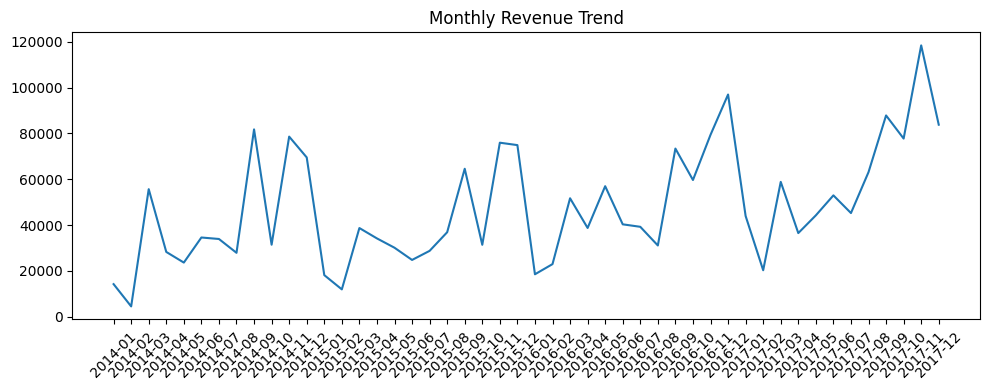

In [17]:
# plot monthly revenue trend and save image
plt.figure(figsize=(10,4))
plt.plot(monthly["month"], monthly["revenue"])

plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.tight_layout()

# save to images folder
import os
os.makedirs("images", exist_ok=True)
plt.savefig("images/monthly_revenue.png")

plt.show()

In [ ]:
# aggregate profit by category
category_col = next((c for c in ["category", "product_category", "segment", "sub_category", "subcategory"] if c in df.columns), None)
profit_col = next((c for c in ["profit", "gross_profit", "net_profit"] if c in df.columns), None)
if category_col is None or profit_col is None:
    print("Missing category/profit column. Available columns:", list(df.columns))
else:
    cat_profit = df.groupby(category_col, as_index=False)[profit_col].sum().sort_values(profit_col, ascending=False)
    cat_profit

Missing category/profit column. Available columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


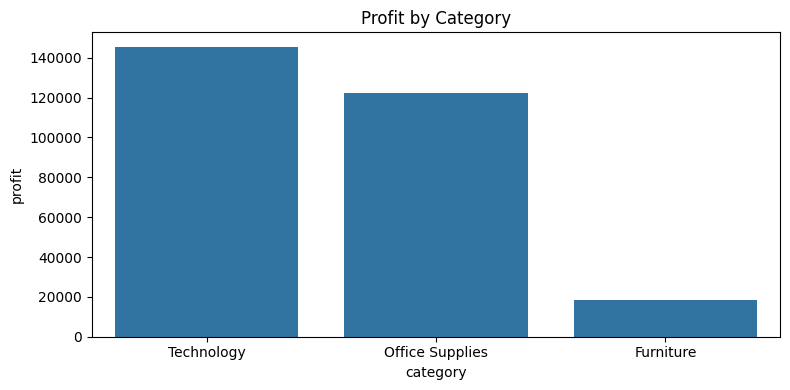

In [19]:
# plot profit by category and save image
category_col = next((c for c in ["category", "product_category", "segment", "sub_category", "subcategory"] if c in df.columns), None)
profit_col = next((c for c in ["profit", "gross_profit", "net_profit"] if c in df.columns), None)
if category_col is None or profit_col is None:
    print("Missing category/profit column. Available columns:", list(df.columns))
else:
    cat_profit = df.groupby(category_col, as_index=False)[profit_col].sum().sort_values(profit_col, ascending=False)
    plt.figure(figsize=(8,4))
    sns.barplot(x=category_col, y=profit_col, data=cat_profit)
    plt.title("Profit by Category")
    plt.tight_layout()

    # save image
    import os
    os.makedirs("images", exist_ok=True)
    plt.savefig("images/profit_by_category.png")

    plt.show()

In [ ]:
# calculate revenue and profit per customer
customer_col = next((c for c in ["customer_name", "customer", "client", "client_name", "customer_id"] if c in df.columns), None)
sales_col = next((c for c in ["sales", "revenue", "sales_amount", "total_sales"] if c in df.columns), None)
profit_col = next((c for c in ["profit", "gross_profit", "net_profit"] if c in df.columns), None)
if customer_col is None or sales_col is None:
    print("Missing customer/sales column. Available columns:", list(df.columns))
else:
    agg_dict = {"revenue": (sales_col, "sum")}
    if profit_col is not None:
        agg_dict["profit"] = (profit_col, "sum")
    top_customers = df.groupby(customer_col, as_index=False).agg(**agg_dict).sort_values("revenue", ascending=False).head(10)

    top_customers

Missing customer/sales column. Available columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [ ]:
# revenue by region
region_col = next((c for c in ["region", "state", "market", "country", "city"] if c in df.columns), None)
if region_col is None:
    print("No region-like column found. Available columns:", list(df.columns))
else:
    revenue_by_region = df.groupby(region_col)["sales"].sum().sort_values(ascending=False)
    revenue_by_region

No region-like column found. Available columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [ ]:
# analyze revenue and profit by discount level
if "discount" in df.columns:
    disc = df.groupby("discount", as_index=False).agg(
        revenue=("sales", "sum"),
        profit=("profit", "sum")
    ).sort_values("discount")

    disc.head()

In [ ]:
# identify high-revenue products with low profit margin (potential business risk)
product_col = next((c for c in ["product_name", "product", "item", "item_name", "product_id"] if c in df.columns), None)
if product_col is None:
    print("No product column found. Available columns:", list(df.columns))
else:
    prod = df.groupby(product_col, as_index=False).agg(
        revenue=("sales", "sum"),
        profit=("profit", "sum")
)

    # calculate profit margin per product
    prod["margin"] = prod["profit"] / prod["revenue"]

    # sort by high revenue and low margin to detect risky products
    risk = prod.sort_values(["revenue", "margin"], ascending=[False, True]).head(15)

    risk

No product column found. Available columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [ ]:
# calculate 3-month moving average
monthly["revenue_ma3"] = monthly["revenue"].rolling(3).mean()
monthly.tail()
# estimate next month revenue (baseline forecast)
next_month_forecast = monthly["revenue_ma3"].iloc[-1]
next_month_forecast

np.float64(93351.35566666664)

In [ ]:
df["order_date"] = pd.to_datetime(df["order_date"])

In [ ]:
df["year"] = df["order_date"].dt.year
df["month"] = df["order_date"].dt.month
df["month_name"] = df["order_date"].dt.month_name()

In [21]:
# export cleaned dataset for Power BI
df.to_csv("../data/processed/" \
"processed_sales.csv", index=False)